1. implement linear SVM algorithm on final boards classification and single label classification.
2. repeat for KNN and multilayer perceptron.
3. write a single program that outputs accuracy and confusion matrices for both datasets and for all the classifiers.

In [8]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
# dataset paths
final_txt_path = "./datasets/datasets-part1/tictac_final.txt"
multi_txt_path = "./datasets/datasets-part1/tictac_multi.txt"
single_txt_path = "./datasets/datasets-part1/tictac_single.txt"

In [9]:
from sklearn.model_selection import train_test_split

def get_test_train(path):
    data_set = open(path,"r")
    # build x and y 
    X = []
    y = []
    for line in data_set:
        temp = line.rstrip().split(" ")
        X.append(temp[:9])
        if len(temp) == 10:
            y.append(temp[-1])
        else:
            y.append(temp[-9:])
    # split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)
    return X_train, X_test, y_train, y_test

# Classifier Functions

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# create function to get accuracy and plot confusion matrix
def get_stats(actual, pred, title, cmap=plt.cm.gray_r):
    accuracy = sklearn.metrics.accuracy_score(actual, pred, normalize=True)
    
    a = pd.Series(actual, name='Actual')
    p = pd.Series(pred, name='Predicted')
    df_confusion = pd.crosstab(a, p)
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    title = title + f" (Accuracy: {round(accuracy, 4)})"
    plt.title(title)
    plt.show()

In [94]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

def clf_pipeline(model, path, title, transform_X=True):
    # get testing data
    X_train, X_test, y_train, y_test = get_test_train(path)
    if transform_X:
        X_train = np.array(X_train, dtype=np.float64)
        X_test = np.array(X_test, dtype=np.float64)
    # get cross-validation score
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross Validation Scores:\n{score}")
    # fit model
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    # print out stats
    get_stats(y_test, y_hat, title)

# Classification: Linear SVM - Final Board State and Optimal Single Move

In [114]:
from sklearn import svm, metrics
clf = svm.SVC(C=1)

Cross Validation Scores:
[0.99074074 0.99537037 0.97685185 0.99074074 0.98611111 0.97685185
 0.99074074 0.98611111 0.97222222 0.98611111]


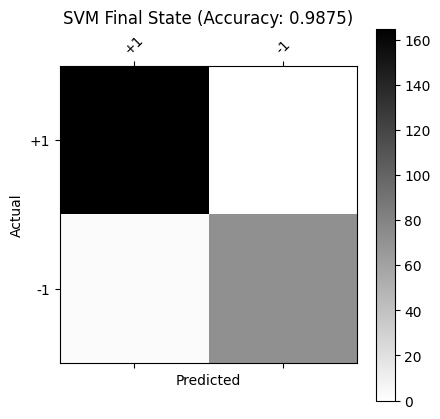

In [115]:
clf_pipeline(clf, final_txt_path, "SVM Final State")

In [116]:
from joblib import dump, load
dump(clf, 'svm_clf_final.joblib')

['svm_clf_final.joblib']

In [117]:
# build model
clf = svm.SVC(C=1)

Cross Validation Scores:
[0.77544098 0.79443691 0.77951153 0.79511533 0.79782904 0.79443691
 0.79240163 0.79647218 0.79918589 0.81750339]


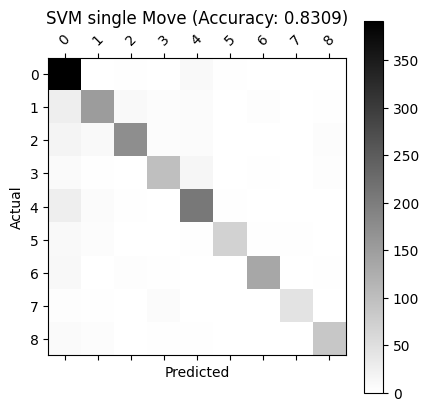

In [118]:
clf_pipeline(clf, single_txt_path, "SVM single Move")

In [119]:
dump(clf, 'svm_clf_single.joblib')

['svm_clf_single.joblib']

# Classification: KNN - Final Board State and Optimal Single Move

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

Cross Validation Scores:
[1.         1.         0.98611111 1.         0.99074074 0.98148148
 0.99074074 0.99537037 0.98611111 0.98611111]


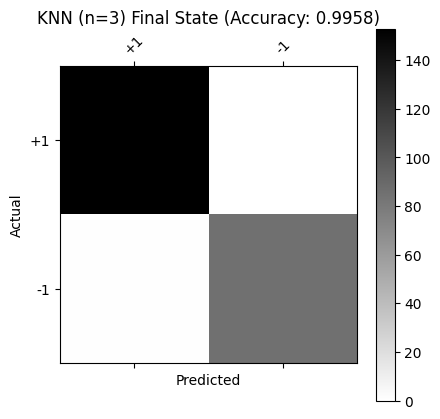

In [121]:
clf_pipeline(knn, final_txt_path, "KNN (n=3) Final State")

In [122]:
dump(knn, 'knn_clf_final.joblib')

['knn_clf_final.joblib']

In [123]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

Cross Validation Scores:
[0.78968792 0.79782904 0.78697422 0.7761194  0.78222524 0.77679783
 0.8046133  0.77476255 0.77137042 0.80122117]


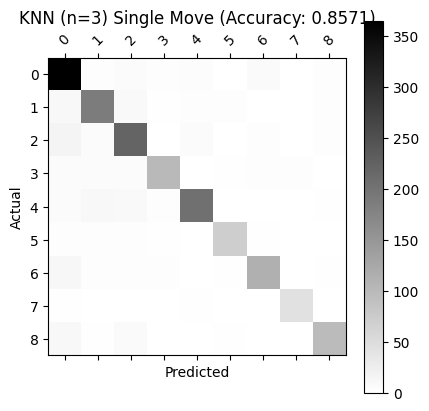

In [124]:
clf_pipeline(knn, single_txt_path, "KNN (n=3) Single Move", transform_X=True)

In [125]:
dump(knn, 'knn_clf_single.joblib')

['knn_clf_single.joblib']

# Classification: MLP - Final Board State and Optimal Single Move

In [126]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=600)

Cross Validation Scores:
[0.98611111 0.98148148 0.99074074 0.98611111 0.99537037 0.98148148
 0.98148148 0.98611111 0.98148148 1.        ]


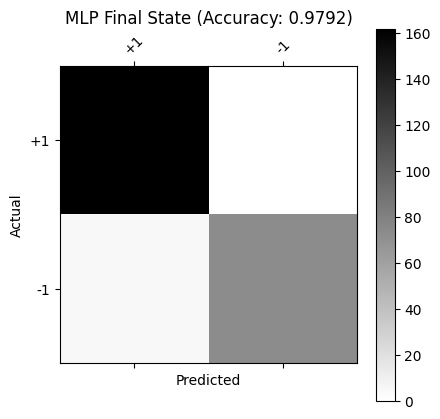

In [127]:
clf_pipeline(mlp, final_txt_path, "MLP Final State", transform_X=True)

In [128]:
dump(mlp, 'mlp_clf_final.joblib')

['mlp_clf_final.joblib']

In [129]:
mlp = MLPClassifier(random_state=1, max_iter=2000)

Cross Validation Scores:
[0.88398915 0.87924016 0.87924016 0.88941655 0.89348711 0.88195387
 0.87516961 0.89755767 0.89959294 0.87109905]


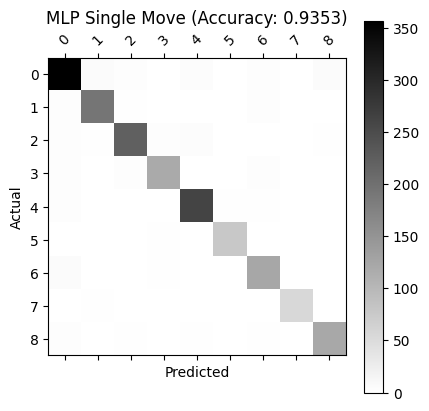

In [130]:
clf_pipeline(mlp, single_txt_path, "MLP Single Move", transform_X=True)

In [131]:
dump(mlp, 'mlp_clf_single.joblib')

['mlp_clf_single.joblib']

# Regression Functions

In [24]:
from sklearn.metrics import root_mean_squared_error

def get_reg_stats(actual, pred):
    accuracy = sklearn.metrics.accuracy_score(actual, pred, normalize=True)
    print(f"Accuracy:\n{accuracy}")
    rmse = root_mean_squared_error(actual, pred)
    print(f"RMSE:\n{round(rmse,4)}")

In [109]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

def reg_pipeline(model, path, transform=True):
    # get testing data
    X_train, X_test, y_train, y_test = get_test_train(path)
    if transform:
        X_train = np.array(X_train, dtype=np.float64)
        X_test = np.array(X_test, dtype=np.float64)
        y_train = np.array(y_train, dtype=np.float64)
        y_test = np.array(y_test, dtype=np.float64)
    # get cross-validation score
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross Validation Scores:\n{score}")
    # fit model
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    for arr in y_hat:
        for i in range(len(arr)):
            if arr[i] >= 0.5:
                arr[i] = 1
            else:
                arr[i] = 0
    # print out stats
    get_reg_stats(y_test, y_hat)

# Regression: KNN - Optimal Multi Move

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2,weights="distance")

In [27]:
reg_pipeline(knn_reg, multi_txt_path)

Cross Validation Scores:
[0.55140073 0.5764239  0.58052073 0.57606772 0.58439506 0.58676308
 0.55549314 0.56016051 0.57509091 0.57254055]
Accuracy:
0.7118437118437119
RMSE:
0.2699


In [28]:
from joblib import dump, load
dump(knn_reg, 'knn_reg.joblib')

['knn_reg.joblib']

# Regression: Linear - Optimal Multi Move

In [110]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
l_reg = MultiOutputRegressor(LinearRegression())

In [111]:
reg_pipeline(l_reg, multi_txt_path)

Cross Validation Scores:
[ 0.00141019  0.00097077 -0.00019564  0.00138292  0.00113924  0.00117354
  0.00060941  0.00154701  0.00234458  0.00356999]
Accuracy:
0.0
RMSE:
0.4587


In [112]:
from joblib import dump, load
dump(l_reg, 'l_reg.joblib')

['l_reg.joblib']

# Regression: MLP - Optimal Multi Move

In [11]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(400,400), max_iter=1000)

In [12]:
reg_pipeline(mlp_reg, multi_txt_path)

Cross Validation Scores:
[0.70662267 0.72158933 0.72863184 0.73376237 0.73379345 0.71454103
 0.71692388 0.71859324 0.72387904 0.71556909]
Accuracy:
0.8376068376068376
RMSE:
0.1654


In [14]:
from joblib import dump, load
dump(mlp_reg, 'mlp_reg.joblib')

['mlp_reg.joblib']